# Proyek Analisis Data: Bike Sharing Dataset

- Nama: Ilham Rizkia N
- Email: ilhamrizkia@student.uns.ac.id
- ID Dicoding: ilhamrizkiagn

# Latar Belakang

Bike sharing system adalah versi terbaru dari rental sepeda konvensional yang mana proses dari pendaftaran member, rental hingga pengembalian semuanya
dilakukan secara otomatis. Melalui sistem ini, pengguna dapat merental dan mengembalikan sepeda dimana saja dengan mudah. Sistem ini sangat bagus
dan memiliki berbagai manfaat baik dari segi kemacetan lalu lintas, berkurangnya polusi serta menjaga kesehatan tubuh.

# Pertanyaan Bisnis

- Pada bulan apa rental sepeda terbanyak terjadi?
- Bagaimana performa jumlah rental setiap harinya?

# Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

## Gathering Data

Proyek ini akan menggunakan satu tabel data. Data tersebut berisi jumlah rental sepeda selama tahun 2011 dan 2012. data tersebut akan registeredyang akan dimuat pada kode berikut

#### Memuat data jumlah rental perjam

In [3]:
hour_df = pd.read_csv('dashboard/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Assessing Data

#### Menilai Data hour_df

In [4]:
hour_df.info() #untuk mencari missing value dan tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
hour_df.duplicated().sum() #untuk mencari jumlah duplikat

np.int64(0)

In [6]:
hour_df.describe(include='all') #untuk mencari karakteristik khusus dari suatu atribut atau kolom

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


tipe data kolom dteday masih object. akan diubah menjadi tipe data datetime. terkait duplikasi dan lainnya, tabel hour_df tidak ada masalah

# Cleaning Data

kolom dteday pada tabel hour_df dan day_df akan diubah pada kode berikut ini

In [7]:
#mengubah tipe data object menjadi string
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

kolom dteday pada tabel hr_df sudah berubah menjadi datetime. sekarang kita sudah bisa melakukan explorasi data

# Exploratory Data Analysis (EDA)

## 1. Pada bulan apa rental sepeda terbanyak terjadi?

untuk menjawab pertanyaan pertama. kita akan menggunakan groupby() berdasarkan kolom mnth untuk melihat jumlah rental pada tiap bulannya. DataFrame baru dibuat agar kita dapat melihat informasi yang telah dikelompokkan

In [17]:
#menghitung jumlah rental sepeda setiap bulannya
rent_month = hour_df.groupby(by='mnth')[['cnt']].sum().reset_index()

# Membuat list nama-nama bulan
bulan = ['Januari','Februari','Maret','April','Mei','Juni','Juli','Agustus','September','Oktober','November','Desember']

# Mengubah format bulan dari angka menjadi nama bulan
for i in range(0,len(bulan)):
    rent_month['mnth'] = rent_month['mnth'].replace(i+1,bulan[i])

rent_month

,mnth,cnt
0,Januari,134933
1,Februari,151352
2,Maret,228920
3,April,269094
4,Mei,331686
5,Juni,346342
6,Juli,344948
7,Agustus,351194
8,September,345991
9,Oktober,322352


Pada kode di atas, groupby() dibuat terlebih dahulu sebelum melakukan replace() pada nama bulan supaya urutan bulan tidak berubah.

Jumlah rental paling besar terjadi pada rentang bulan mei sampai oktober, bulan-bulan tersebut paling banyak terjadi di musim gugur.

Untuk memastikan rental terbanyak berdasarkan musimnya, kita dapat melakukan groupby() berdasarkan season. Sebelum itu, kita dapat mengubah nilai kolom season dari data integer menjadi string sebagai berikut:
- 1 : Springer
- 2 : Summer
- 3 : Fall
- 4 : Winter

Perubahan nilai dimaksudkan untuk memudahkan dalam meraih informasi agar dapat langsung dipahami. Perubahan dapat kita lakukan menggunakan 

In [18]:
hour_df['season'].replace({1:'Springer',2:'Summer',3:'Fall',4:'Winter'},inplace=True)
rent_season = hour_df.groupby(by='season')[['cnt']].sum().reset_index()
rent_season

,season,cnt
0,Fall,1061129
1,Springer,471348
2,Summer,918589
3,Winter,841613


DataFrame ini membuktikan bahwa jumlah rental terbanyak terjadi di musim gugur (Fall)

# 2. Bagaimana trend jumlah rental pada jam-jam tertentu?

Pengguna akan melakukan rental sepeda pada waktu-waktu tertentu tergantung kondisi dan kebutuhan. DataFrame baru dibuat seperti kasus pertanyaan pertama agar dapat melihat informasi tren pada jam tertentu. kita perlu mengelompokkan jumlah rental berdasarkan jam pada DataFrame baru.

In [19]:
rent_day = hour_df.groupby(by='hr',as_index=False)[['cnt']].sum()
print(rent_day)

    hr     cnt
0    0   39130
1    1   24164
2    2   16352
3    3    8174
4    4    4428
5    5   14261
6    6   55132
7    7  154171
8    8  261001
9    9  159438
10  10  126257
11  11  151320
12  12  184414
13  13  184919
14  14  175652
15  15  183149
16  16  227748
17  17  336860
18  18  309772
19  19  226789
20  20  164550
21  21  125445
22  22   95612
23  23   63941


# Visualization & Explanatory Analysis

## 1. Pada bulan apa rental sepeda terbanyak terjadi?

Kita akan menggunakan bar chart untuk mengetahui jumlah rental terbanyak pada tiap bulannya dan tiap musimnya. Chart ini akan mengambil nilai **mnth** dan **season** sebagai sumbu-x dan nilai **cnt** sebagai sumbu-y

C:\Users\asus\AppData\Local\Temp\ipykernel_5412\329165884.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="season", y="cnt", data=rent_season.sort_values(by='cnt',ascending=False),ax=ax[1],palette=["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"])


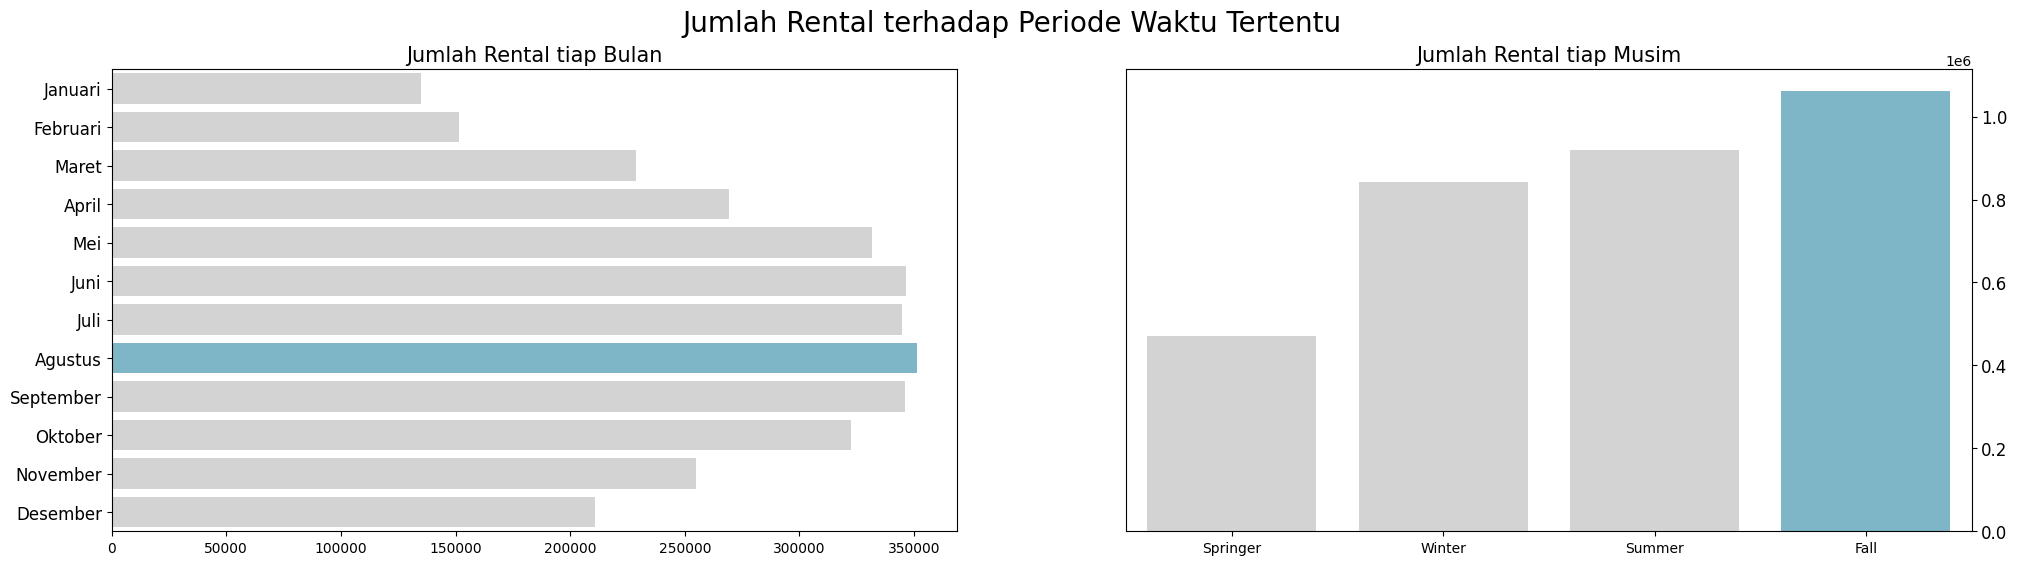

In [24]:
#mengatur ukuran chart dan jumlah kolom chart
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

#membuat barchart perbulan di sebelah kiri
sns.barplot(y="mnth", x="cnt", hue="mnth",data=rent_month, ax=ax[0],palette=["#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Jumlah Rental tiap Bulan", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

#membuat barchart permusim di sebelah kanan
sns.barplot(x="season", y="cnt", data=rent_season.sort_values(by='cnt',ascending=False),ax=ax[1],palette=["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Jumlah Rental tiap Musim", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
 
plt.suptitle("Jumlah Rental terhadap Periode Waktu Tertentu", fontsize=20)
plt.show()

seperti yang terlihat, rental sepeda terbanyak terjadi pada rentang bulan mei hingga oktober dan puncaknya ada di bulan Agustus. Rentang bulan tersebut berada pda musim gugur

# 2. Bagaimana trend jumlah rental pada jam-jam tertentu?

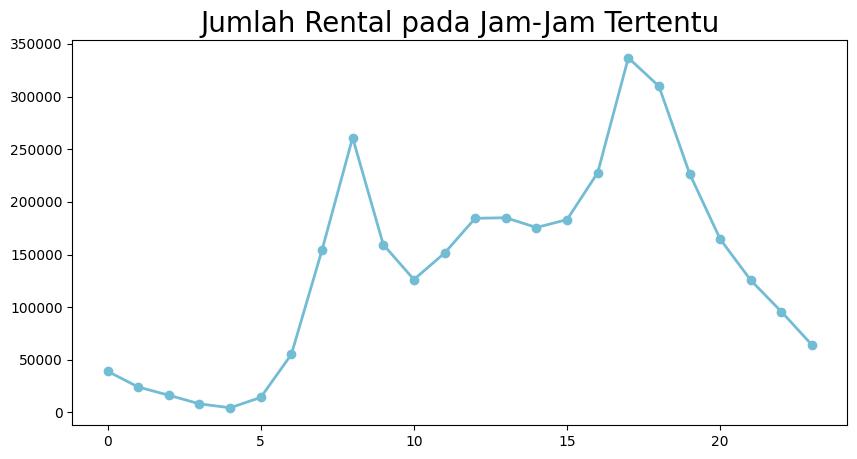

In [15]:
plt.figure(figsize=(10, 5))

plt.plot(rent_day['hr'], rent_day['cnt'], marker='o', linewidth=2, color="#72BCD4") 
plt.title("Jumlah Rental pada Jam-Jam Tertentu", loc="center", fontsize=20) 
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()

Tren rental sepeda menngalai naik-mundur. Kenaikan sempat terjadi pada jam 4 sampai jam 8, menurun lagi pada jam 9 dan naik kembali pada jam 11. Rental paling tinggi terjadi pada jam 17 atau jam 5 sore. Pola ini mengikuti waktu jam berangkat kerja karyawan (jam 8 pagi) dan jam pulang karyawan (jam 17 sore). Mengutip halaman web https://www.voaindonesia.com/a/article-10-ribu-orang-bersepeda-ke-kantor-122349409/93473.html, setiap tahun di Washingtong DC diadakan hari *bike to work* serta terdapat anggapan sebagian warganya bahwa bersepeda lebih aman daripada menggunakan transportasi lainnya, sehingga kemungkinan besar pengguna yang melakukan rental didominasi oleh karyawan (perlu lakukan penelitian lebih lanjut).

# Conclusion

- Conclution pertanyaan 1

Pengguna cenderung rental sepeda pada musim gugur. Hal ini dikarenakan cuaca yang  tidak tidak terlalu dingin. Pihak pengembang Bike Rental System dapat memanfaatkan kondisi ini dengan memberikan pelayanan optimal di musim gugur serta memberikan berbagai promo menarik untuk menarik lebih banyak pengguna.

- Conclution pertanyaan 2

Jumlah rental sepeda terjadi pada waktu-waktu tertentu sehingga pengembang Bike Rental System perlu memerhatikan waktu-waktu krusial agar tidak terjadi kendala pada sistem.